In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Factors Affecting Unemployment: Regression Analysis

## About Dataset
This ia a multiple regression problem wherein we'll predict the Unemployment Rate in India for a given time period given it's Per Capita Income, Poverty Rate, Literacy Rate, Labour Force and Youth Unemployment Rate.

The data is a time series from the year 1991 to 2021. All the factors mentioned in the data are significant.

In [4]:
file_name = "data/Projct_Regression.csv"
df = pd.read_csv(file_name)
df.head()

,Years,Unemployment rate,Per capita,Poverty Rate,Literacy Rate,Labour Force,Youth UR
0,1991,0.0560,304,7.6,91.66,0.4691,0.1547
1,1992,0.0573,318,9.4,91.66,0.4671,0.1586
2,1993,0.0569,302,10.0,91.66,0.4656,0.1589
3,1994,0.0574,346,11.1,91.66,0.4645,0.1609
4,1995,0.0576,374,13.4,86.14,0.4612,0.1625


In [5]:
#formatting column names
df.columns = df.columns.str.replace(" ", "_").str.lower().to_list()
df

,years,unemployment_rate,per_capita,poverty_rate,literacy_rate,labour_force,youth_ur
0,1991,0.0560,304,7.6,91.66,0.4691,0.1547
1,1992,0.0573,318,9.4,91.66,0.4671,0.1586
2,1993,0.0569,302,10.0,91.66,0.4656,0.1589
3,1994,0.0574,346,11.1,91.66,0.4645,0.1609
4,1995,0.0576,374,13.4,86.14,0.4612,0.1625
5,1996,0.0574,400,18.1,86.14,0.4579,0.1633
6,1997,0.0561,415,18.7,86.14,0.4547,0.1615
7,1998,0.0567,413,22.5,86.14,0.4514,0.1640
8,1999,0.0574,441,22.5,86.14,0.4482,0.1669
9,2000,0.0556,442,22.5,86.14,0.4449,0.1640


In [6]:
#checking null values
df.isnull().sum()

years                0
unemployment_rate    0
per_capita           0
poverty_rate         0
literacy_rate        0
labour_force         0
youth_ur             0
dtype: int64

**Observations:** Based on the result there is no null values on the dataset.

In [7]:
#checking duplicate data
print(f' This dataset has {df.duplicated().sum()} duplicated value')

 This dataset has 0 duplicated value


**Observations:** The dataset has 0 duplicated values.

In [8]:
#checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   years              31 non-null     int64  
 1   unemployment_rate  31 non-null     float64
 2   per_capita         31 non-null     int64  
 3   poverty_rate       31 non-null     float64
 4   literacy_rate      31 non-null     float64
 5   labour_force       31 non-null     float64
 6   youth_ur           31 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.8 KB


**Observations:** The datatypes for all of the columns actually are fine, but we need to cast years as datetime for dataviz.

In [9]:
#cast year as datetime
df["years"] = pd.to_datetime(df["years"], format='%Y')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   years              31 non-null     datetime64[ns]
 1   unemployment_rate  31 non-null     float64       
 2   per_capita         31 non-null     int64         
 3   poverty_rate       31 non-null     float64       
 4   literacy_rate      31 non-null     float64       
 5   labour_force       31 non-null     float64       
 6   youth_ur           31 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.8 KB


In [11]:
df.head()

,years,unemployment_rate,per_capita,poverty_rate,literacy_rate,labour_force,youth_ur
0,1991-01-01,0.0560,304,7.6,91.66,0.4691,0.1547
1,1992-01-01,0.0573,318,9.4,91.66,0.4671,0.1586
2,1993-01-01,0.0569,302,10.0,91.66,0.4656,0.1589
3,1994-01-01,0.0574,346,11.1,91.66,0.4645,0.1609
4,1995-01-01,0.0576,374,13.4,86.14,0.4612,0.1625


**Observations:** The datatypes for all columns are align with our use case.

In [12]:
#descriptive statistics
df.describe().T

,count,mean,min,25%,50%,75%,max,std
years,31,2005-12-31 20:54:11.612903168,1991-01-01 00:00:00,1998-07-02 12:00:00,2006-01-01 00:00:00,2013-07-02 12:00:00,2021-01-01 00:00:00,NaN
unemployment_rate,31.0,0.056452,0.0527,0.05435,0.0558,0.0568,0.08,0.004629
per_capita,31.0,1004.903226,302.0,428.0,802.0,1505.0,2257.0,638.772174
poverty_rate,31.0,34.464516,7.6,22.5,39.9,47.6,50.6,14.830432
literacy_rate,31.0,76.657097,61.9,61.9,81.13,86.14,91.66,11.266264
labour_force,31.0,0.383161,0.2325,0.30995,0.4224,0.4498,0.4691,0.080578
youth_ur,31.0,0.188926,0.1547,0.164,0.1768,0.2095,0.2826,0.031549


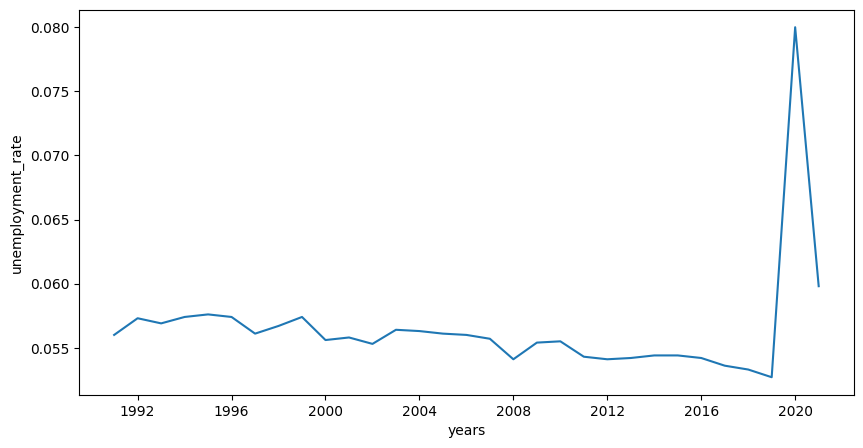

In [13]:
#plotting unemployment rate in india by year
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.lineplot(data= df, x='years', y='unemployment_rate')
plt.show()

In [14]:
df

,years,unemployment_rate,per_capita,poverty_rate,literacy_rate,labour_force,youth_ur
0,1991-01-01,0.0560,304,7.6,91.66,0.4691,0.1547
1,1992-01-01,0.0573,318,9.4,91.66,0.4671,0.1586
2,1993-01-01,0.0569,302,10.0,91.66,0.4656,0.1589
3,1994-01-01,0.0574,346,11.1,91.66,0.4645,0.1609
4,1995-01-01,0.0576,374,13.4,86.14,0.4612,0.1625
5,1996-01-01,0.0574,400,18.1,86.14,0.4579,0.1633
6,1997-01-01,0.0561,415,18.7,86.14,0.4547,0.1615
7,1998-01-01,0.0567,413,22.5,86.14,0.4514,0.1640
8,1999-01-01,0.0574,441,22.5,86.14,0.4482,0.1669
9,2000-01-01,0.0556,442,22.5,86.14,0.4449,0.1640


**Observations:** Based on the line plot above the trend of unemployment rate from 1991 to 2019 actually is in downtrend, But the trend spike in 2020, is it because of covid?

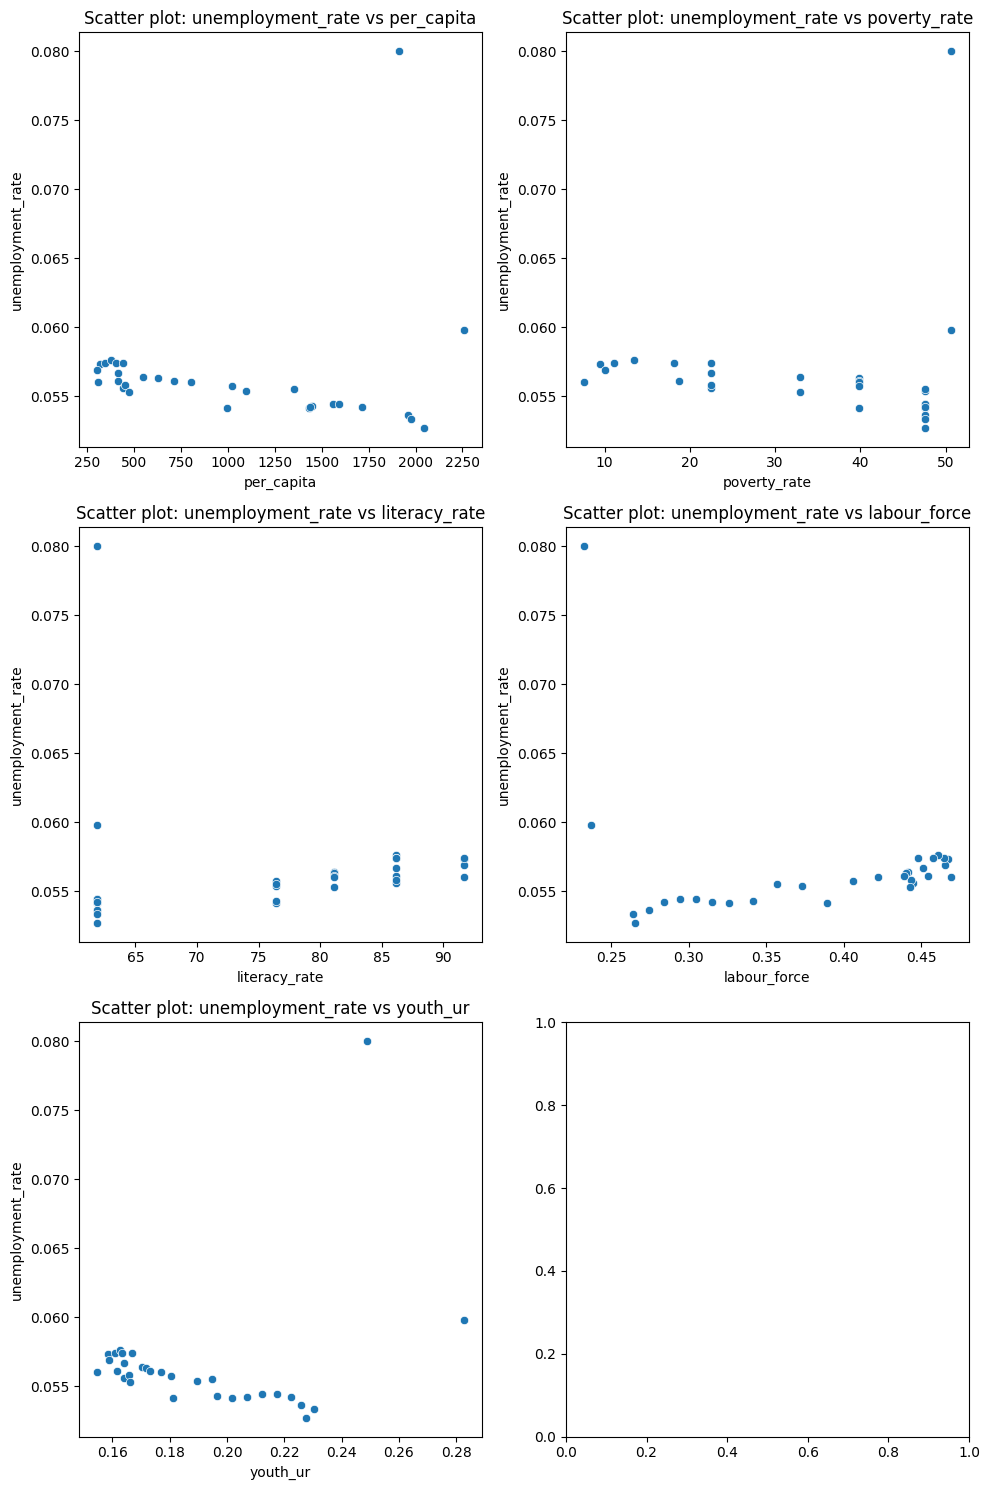

In [15]:
#plotting all predictors variable against dependent with scatter plot
plot_df = df.copy()
subset_col = plot_df.columns[2:].to_list()
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
# Plot scatterplots for each column in the subset
for i, col in enumerate(subset_col):
    sns.scatterplot(data=df, x=df[col], y="unemployment_rate", ax=ax[i // 2, i % 2])
    ax[i // 2, i % 2].set_xlabel(col)
    ax[i // 2, i % 2].set_ylabel("unemployment_rate")
    ax[i // 2, i % 2].set_title(f"Scatter plot: unemployment_rate vs {col}")
plt.tight_layout()
plt.show()

**Observations:** As you can see from all the graphs above, there are linear relationship (negative and positive) from each predictors and dependant variable, because of that we can do linear regression modelling, since meeting linear regression assumptions.

The 1 point that spike above the average actually the time when covid hit, but for this notebook i dont want to exclude it.

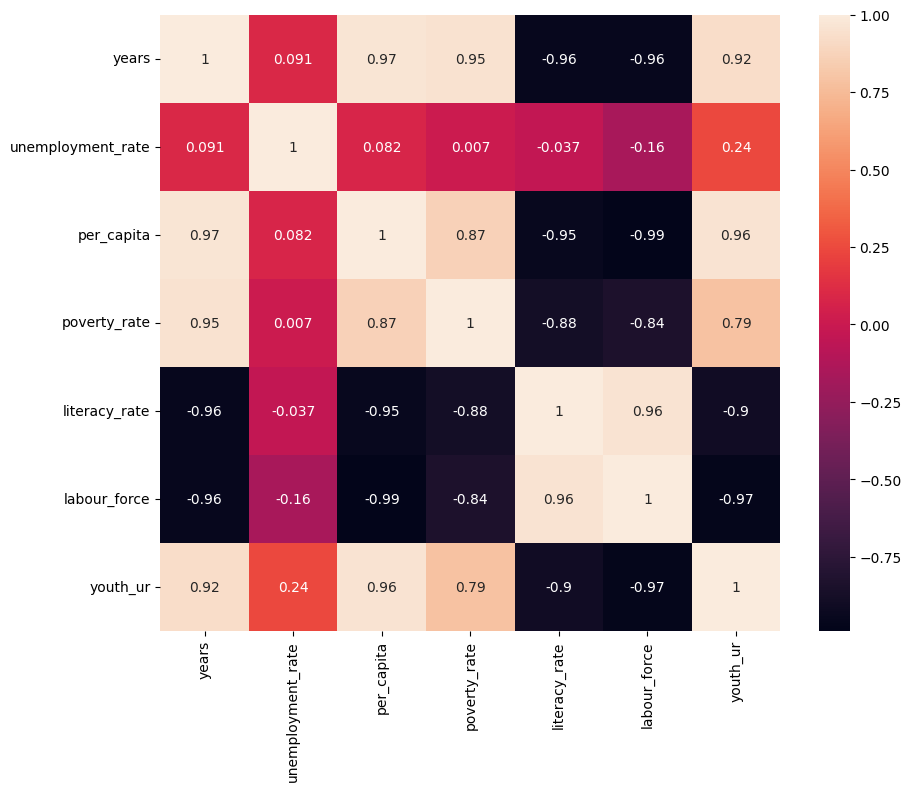

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

**Observations:** Based on correlation heatmap, the only variable that does have strong correlation with dependent variable (unemployment_rate) is Per_capita

And there are a lots of corelation between each independent variables, it seems that our data has a multicolinearity

Hypothesis test in regression analysis is know that the linear relationship between the variables is statistically significant, even if the correlation is weak. This means that while the strength of the linear relationship is not very high, it is still unlikely to have occurred by random chance.
- What to prove: **Relationship** between independent variable and dependent variable .

- Then we state null hypothesis ($H_0$)
    - ($H_0$): No relationship between independent variable and dependent variable.
    ($H_0:P_{Value} > \alpha$)


- Alternative hypothesis ($H_1$) is the opposite claim of ($H_0$)
    - ($H_1$): There is relationship between independent variable and dependent variable.
        ($H_1:P_{Value} < \alpha$)

- Set significance level alpha ($\alpha$) = 0.05

In [17]:
import statsmodels.formula.api as smf
model = smf.ols(formula = 'unemployment_rate ~ \
       youth_ur + poverty_rate + \
       literacy_rate + labour_force + \
       per_capita' , data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      unemployment_rate   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     7.383
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           0.000227
Time:                        13:44:23   Log-Likelihood:                 137.22
No. Observations:                  31   AIC:                            -262.4
Df Residuals:                      25   BIC:                            -253.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0958      0.032      2.982

**Observations:** As you can see on the summary above especially in P>|t| section, all of independent variable actually has statistical significant linear relationship with dependent variable since all of $P_{Value} <$ $\alpha$

But our regression model its not really that good since rsquared is 60, it means that this model has abillity to explain 60% variance of unemployment_rate, the higher the better.

**Coefficient intrepertation:**
- The **Intercept** symbolize unemployment_rate coefficient, to read the result of this model is, with 0 of youth_ur, 0 of poverty_rate, 0 of literacy_rate, 0 of labour_force, and 0 of percapita, actually generate 0.0958 unemployment rate. (WHICH IS THE NULL MODEL FOR LINEAR REGRESSION)

Mathematic formula from the result above:

<p style="text-align: center; font-size: 20px; border: solid 1px">$y = intercept + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 $  </p>

to predict the unemployment_rate based on summary above, actually as simple as using this math formula below:
<p style="text-align: center; font-size: 15px">$y = 0.0958 + 0.1895 * \text{youth_ur} + 0.0002 * \text{poverty_rate} + 0.0007 * \text{litteracy_rate} + -0.2568 * \text{labour_force} + -3.38e^{-05} * \text{per_capita} $ </p>
the question how the unployment_rate intercept from the model actually 0.0958 meanwhile the mean of unemployment rate is less than that. its not intuitive right? so to tackle this problem im going to standardize the independent variable by subtracting by their mean.

Formula for centering the variable is:
 <p style="text-align: center; font-size: 20px; border: solid 1px">$X_c = X - \bar{X}$ </p>
  <p style="text-align: center; font-size: 20px">$X_c = \text{independent_variable} - \text{mean_independent_varible}$ </p>

In [18]:
#centering with the mean for easier intrepertation
mean_per_capita = df["per_capita"].mean()
mean_poverty_rate = df["poverty_rate"].mean()
mean_literacy_rate = df["literacy_rate"].mean()
mean_labour_force = df["labour_force"].mean()
mean_youth_ur = df["youth_ur"].mean()


In [19]:
df["center_percapita"] = df["per_capita"] - mean_per_capita
df["center_poverty_rate"] = df["poverty_rate"] - mean_poverty_rate
df["center_literacy_rate"] = df["literacy_rate"] - mean_literacy_rate
df["center_labour_force"] = df["labour_force"] - mean_labour_force
df["center_youth_ur"] = df["youth_ur"] - mean_youth_ur


In [20]:
#remodelling with centered variable
model = smf.ols(formula = 'unemployment_rate ~ \
       center_percapita + center_poverty_rate + \
       center_literacy_rate + center_labour_force + \
       center_youth_ur' , data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      unemployment_rate   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     7.383
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           0.000227
Time:                        13:44:23   Log-Likelihood:                 137.22
No. Observations:                  31   AIC:                            -262.4
Df Residuals:                      25   BIC:                            -253.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0565 

**Observations:** As you can see on the summary above the intercept for the model after we centering the mean, its 0.565.


**Coefficient intrepertation:**
- The **Intercept** symbolize coefficient of unemployment_rate, to read the result of this model is, **the average of unemployment_rate whose have a average of youth_ur, average of poverty_rate, average of literacy_rate, average of labour_force, and average of percapita is 0.0565**

to predict the unemployment_rate based on summary above, with centered mean actually as simple as using this math formula below:
<p style="text-align: center; font-size: 14px">$y = 0.0565 + 0.1895 * (\text{youth_ur} - \text{mean_youth_ur})  + 0.0002 * (\text{poverty_rate}- \text{mean_poverty_rate}) + 0.0007 * (\text{litteracy_rate} - \text{mean_literacy_rate}) + -0.2568 * (\text{labour_force} - \text{mean_labour_force}) + -3.38e^{-05} * (\text{per_capita} - \text{mean_per_capita}) $ </p>

the result actually the same with modelling without centered the variable, but for easier intrepertation and to make the model more intuitive we centered the variable.

In [21]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from statsmodel
    :return df: <pandas DataFrame> combined estimated coefficient and standard error of model estimate
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

### Model Intrepertation

Table below is the coefficient and std_err of model

In [22]:
coef_err = print_coef_std_err(result)
coef_err

,coef,std err
Intercept,0.056452,0.000579
center_percapita,-0.000034,0.000007
center_poverty_rate,0.000212,0.000099
center_literacy_rate,0.000651,0.000222
center_labour_force,-0.256843,0.066229
center_youth_ur,0.189507,0.077398


**Observations:** Based on the table above we can draw an insight about relationship from each independent variable with dependent variable.

- Intercept (0.056452): This is the estimated value of the dependent variable when all independent variables are zero.

- center_percapita (-0.000034): A one-unit increase in center_percapita is associated with a decrease of 0.000034 in the dependent variable.

- center_poverty_rate (0.000212): A one-unit increase in center_poverty_rate is associated with an increase of 0.000212 in the dependent variable.

- center_literacy_rate (0.000651): A one-unit increase in center_literacy_rate is associated with an increase of 0.000651 in the dependent variable.

- center_labour_force (-0.256843): A one-unit increase in center_labour_force is associated with a decrease of 0.256843 in the dependent variable.

- center_youth_ur (0.189507): A one-unit increase in center_youth_ur is associated with an increase of 0.189507 in the dependent variable.

### Conclusion
Based on the result above we can draw conclusion: if we want to reduce unemployment_rate lets focus on reducing unit in variable that has positive coefficient value especially `center_youth_ur` and increase an unit for variable that has negative coefficient value `center_labour_force` and `center_percapita` 

## Business Recomendations
Im going to focus on the 2 variable that has big impact to dependent variable
- `center_labour_force` This coefficient suggests that as the center's labor force increases by one unit, the dependent variable (presumably the unemployment rate) decreases by 0.256843 units.
To reduce the unemployment rate, government might consider initiatives that increase the overall labor force, such as expanding hiring efforts, providing training programs, or promoting workforce development.

- `center_youth_ur` This coefficient indicates that as the center's youth unemployment rate increases by one unit, the dependent variable increases by 0.189507 units.
To address youth unemployment, government could focus on targeted programs like internships, mentorship, and skill-building initiatives for young individuals, aiming to improve their employability.

## Further Research Recomendations

For the upcoming study, it is essential to make adjustments during the modeling process. This involves addressing issues such as potential multicollinearity by employing methods like the VIF approach. Decisions need to be made regarding whether to retain or eliminate certain columns to effectively resolve the problem.

Need more information about the "labour_force" column, particularly who dominates it - whether it's comprised mainly of employed or non-employed individuals. Given its strong negative correlation with "per_capita," it suggests that the labor force is predominantly made up of non-employed individuals.

In summary, this model is straightforward in illustrating how independent variables impact the unemployment rate.